<a href="https://colab.research.google.com/github/NavyaNanduri/Navya-Nanduri/blob/main/HW3_PA%26AI_Nnanduri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Homework 3 – Target Marketing Campaign with Machine Learning
# **Course**: MSBA5404 – Predictive Analytics and AI
# **Instructor**: Dr. Chae
# **Objective**: Predict whether banking customers will purchase a variable annuity product using machine learning models.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style='whitegrid')


In [ ]:
!pip install pyreadstat seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 40.9 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Loading the data
import pandas as pd

df = pd.read_sas("/content/drive/MyDrive/Colab Notebooks/develop (1).sas7bdat", format='sas7bdat')
df.head()


,AcctAge,DDA,DDABal,CashBk,Checks,DirDep,NSF,NSFAmt,Phone,Teller,...,CRScore,Moved,InArea,Ins,Branch,Res,Dep,DepAmt,Inv,InvBal
0,0.3,1.0,419.27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,696.0,0.0,1.0,1.0,b'B17',b'R',2.0,1170.06,0.0,0.0
1,0.7,1.0,1986.81,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,674.0,0.0,1.0,0.0,b'B2',b'R',1.0,446.93,0.0,0.0
2,4.1,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,640.0,0.0,1.0,1.0,b'B3',b'S',0.0,0.00,0.0,0.0
3,0.5,1.0,1594.84,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,672.0,0.0,1.0,0.0,b'B1',b'S',1.0,1144.24,0.0,0.0
4,6.7,1.0,2813.45,0.0,2.0,0.0,0.0,0.0,0.0,5.0,...,648.0,0.0,1.0,1.0,b'B1',b'S',2.0,1208.94,0.0,0.0


In [ ]:
# Basic shape and data types
df.shape

(32264, 48)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32264 entries, 0 to 32263
Data columns (total 48 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   AcctAge  32264 non-null  float64
 1   DDA      32264 non-null  float64
 2   DDABal   32264 non-null  float64
 3   CashBk   32264 non-null  float64
 4   Checks   32264 non-null  float64
 5   DirDep   32264 non-null  float64
 6   NSF      32264 non-null  float64
 7   NSFAmt   32264 non-null  float64
 8   Phone    32264 non-null  float64
 9   Teller   32264 non-null  float64
 10  Sav      32264 non-null  float64
 11  SavBal   32264 non-null  float64
 12  ATM      32264 non-null  float64
 13  ATMAmt   32264 non-null  float64
 14  POS      32264 non-null  float64
 15  POSAmt   32264 non-null  float64
 16  CD       32264 non-null  float64
 17  CDBal    32264 non-null  float64
 18  IRA      32264 non-null  float64
 19  IRABal   32264 non-null  float64
 20  LOC      32264 non-null  float64
 21  LOCBal   322

In [ ]:
# Summary statistics
df.describe(). T.style.background_gradient(cmap='Blues')

,count,mean,std,min,25%,50%,75%,max
AcctAge,32264.000000,5.779804,6.329251,0.300000,2.100000,3.900000,6.300000,61.500000
DDA,32264.000000,0.815646,0.387779,0.000000,1.000000,1.000000,1.000000,1.000000
DDABal,32264.000000,2170.016712,7282.726998,-774.830000,59.940000,571.820000,1834.232500,278093.830000
CashBk,32264.000000,0.015962,0.131368,0.000000,0.000000,0.000000,0.000000,4.000000
Checks,32264.000000,4.259918,5.156643,0.000000,0.000000,2.000000,7.000000,49.000000
DirDep,32264.000000,0.295562,0.456302,0.000000,0.000000,0.000000,1.000000,1.000000
NSF,32264.000000,0.087063,0.281932,0.000000,0.000000,0.000000,0.000000,1.000000
NSFAmt,32264.000000,2.290546,14.363677,0.000000,0.000000,0.000000,0.000000,666.850000
Phone,32264.000000,0.353645,1.128192,0.000000,0.000000,0.000000,0.000000,30.000000
Teller,32264.000000,1.365268,2.283765,0.000000,0.000000,0.000000,2.000000,27.000000


In [ ]:
df['Ins'].value_counts()

,count
Ins,
0.0,21089
1.0,11175


In [ ]:
df['Ins'].value_counts(normalize=True)

,proportion
Ins,
0.0,0.653639
1.0,0.346361


In [ ]:
df['Res'].value_counts()

,count
Res,
b'U',12681
b'S',11506
b'R',8077


<Axes: >

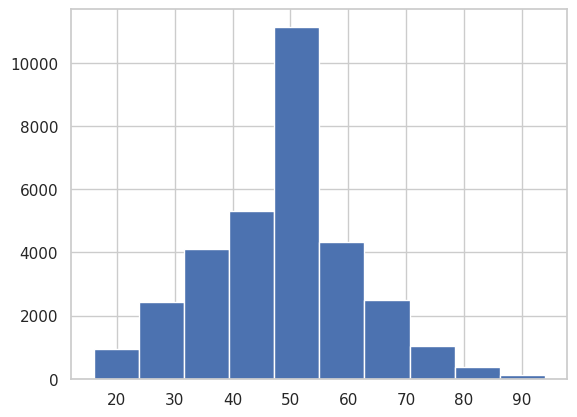

In [ ]:
df['Age'].hist()

<Axes: ylabel='Frequency'>

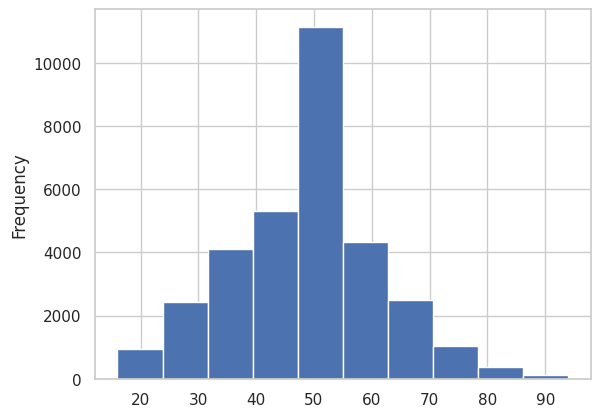

In [ ]:
df['Age'].plot(kind='hist')

In [ ]:
# Check missing values, outliers, or any anomalies in the data
missing = df.isnull().sum()
missing[missing > 0].sort_values(ascending=False)



,0


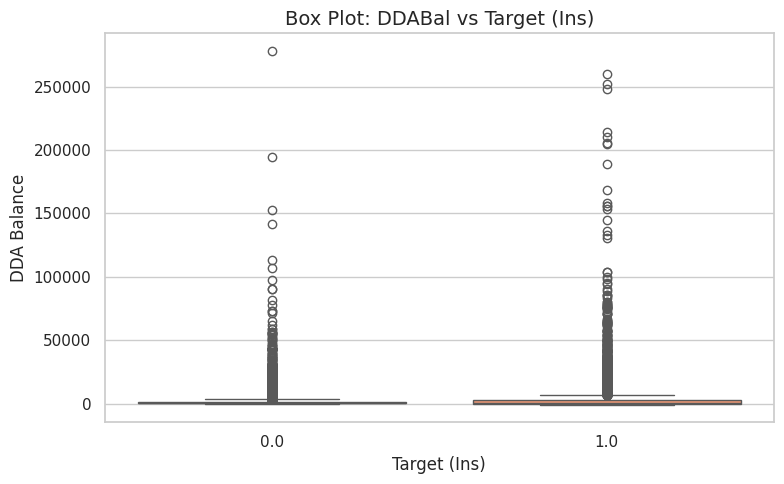

In [ ]:
# outlier detection DDABAL vs Target

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Ins', y='DDABal', hue='Ins', palette='Set2', legend=False)
plt.title('Box Plot: DDABal vs Target (Ins)', fontsize=14)
plt.xlabel('Target (Ins)')
plt.ylabel('DDA Balance')
plt.tight_layout()
plt.show()


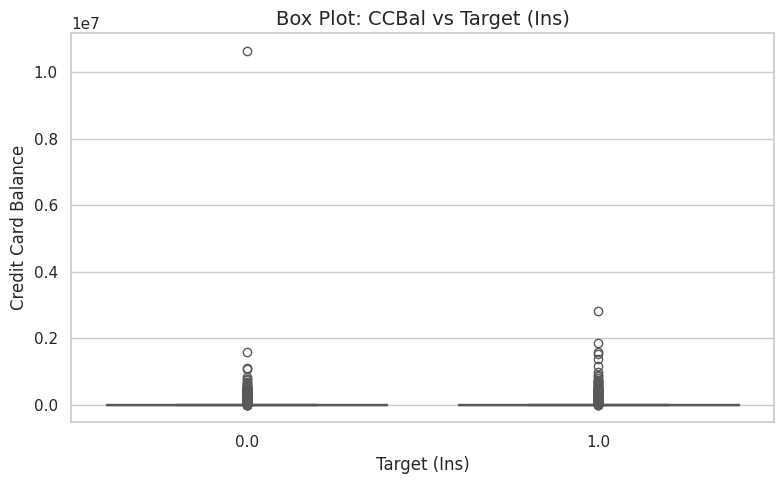

In [ ]:
#outlier detection CCBal vs Target(Ins)

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Ins', y='CCBal', hue='Ins', palette='Set2', legend=False)
plt.title('Box Plot: CCBal vs Target (Ins)', fontsize=14)
plt.xlabel('Target (Ins)')
plt.ylabel('Credit Card Balance')
plt.tight_layout()
plt.show()

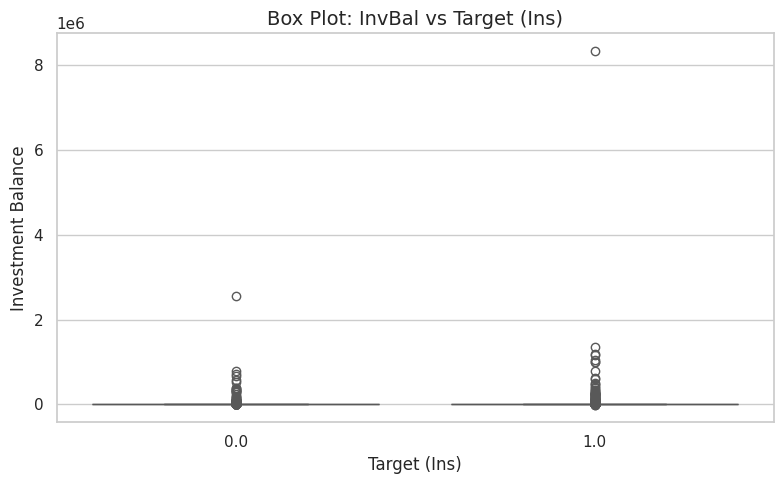

In [ ]:
#outlier detection InvBal vs Target (Ins)

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Ins', y='InvBal', hue='Ins', palette='Set2', legend=False)
plt.title('Box Plot: InvBal vs Target (Ins)', fontsize=14)
plt.xlabel('Target (Ins)')
plt.ylabel('Investment Balance')
plt.tight_layout()
plt.show()

In [ ]:
# Check for any fields with lower counts
desc = df.describe(include='all').T
incomplete_cols = desc[desc['count'] < len(df)]
print(incomplete_cols[['count']])


Empty DataFrame
Columns: [count]
Index: []


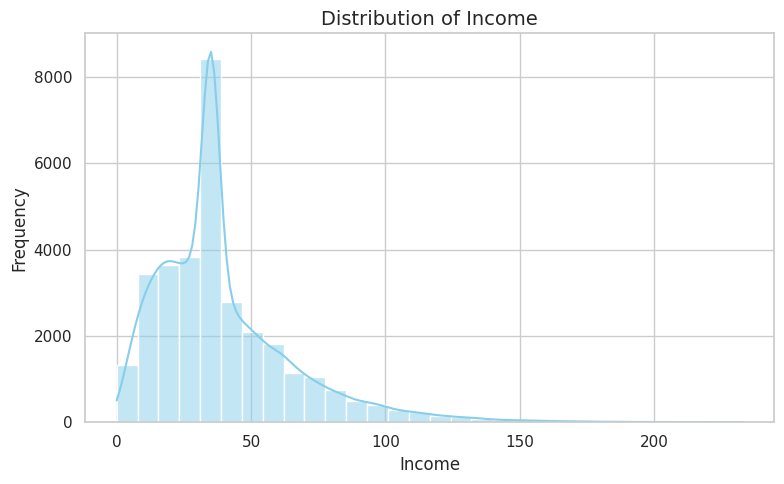

In [ ]:
# Distribution of Numerical Columns

import seaborn as sns
import matplotlib.pyplot as plt

# Set consistent visual style
sns.set(style="whitegrid")

# Example for one variable
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Income', kde=True, color='skyblue', bins=30)
plt.title('Distribution of Income', fontsize=14)
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


In [ ]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_cols:
    min_val = df[col].min()
    max_val = df[col].max()
    if min_val < 0 or max_val > 100000:
        print(f"{col}: Min = {min_val}, Max = {max_val}")


DDABal: Min = -774.83, Max = 278093.83
SavBal: Min = 0.0, Max = 700026.94
ATMAmt: Min = 0.0, Max = 427731.26
CDBal: Min = 0.0, Max = 1053900.0
IRABal: Min = 0.0, Max = 596497.6
LOCBal: Min = -613.0, Max = 523147.24
MMBal: Min = 0.0, Max = 120801.11
MTGBal: Min = 0.0, Max = 10887573.28
CCBal: Min = -2060.51, Max = 10641354.78
DepAmt: Min = 0.0, Max = 484893.67
InvBal: Min = -2214.92, Max = 8323796.02


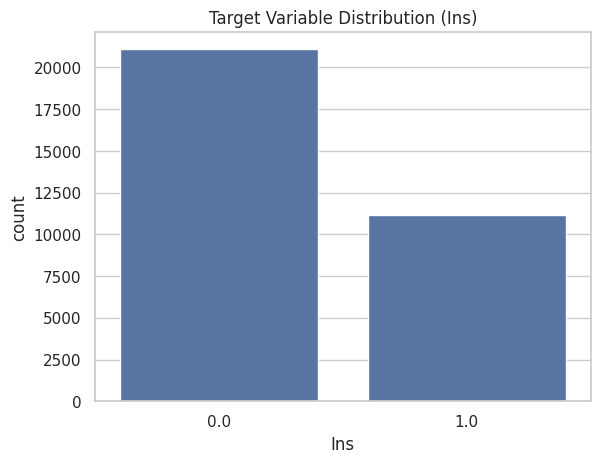

In [ ]:
# Target distribution
sns.countplot(x='Ins', data=df)
plt.title("Target Variable Distribution (Ins)")
plt.show()


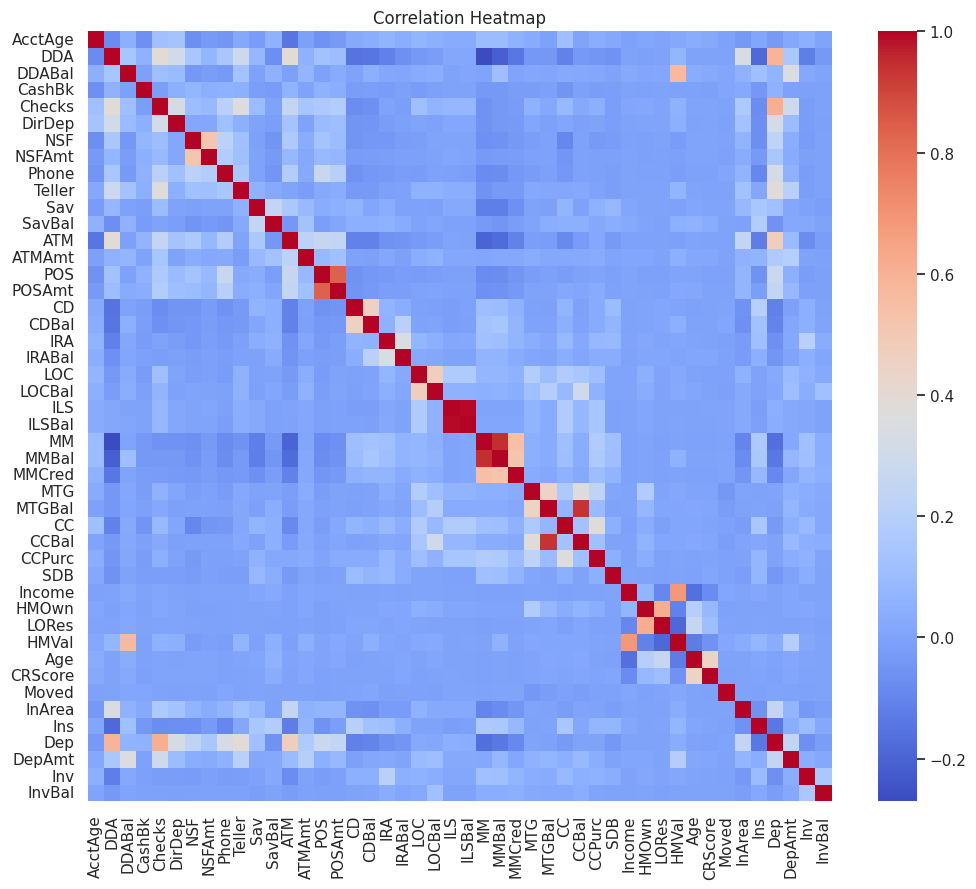

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()

# EDA visualizations completed

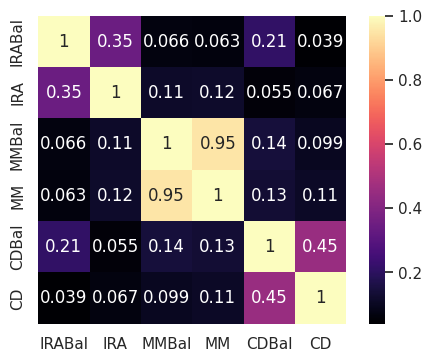

In [ ]:
#Checking correlation between few selected columns as are under warmer areas in the heatmap above
selected_columns = ['IRABal', 'IRA', 'MMBal', 'MM', 'CDBal', 'CD']
corr = df[selected_columns].corr()

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='magma', square=True)
plt.show()

# EDA visualizations completed

In [ ]:
## Data Preprocessing
    * Handle missing values.
    * Encode nominal variables.
    * Scale data if necessary.
    * Split data into training and testing sets (e.g., 50/50 split).

IndentationError: unexpected indent (<ipython-input-19-b33226821288>, line 2)

In [ ]:
# Find categorical columns
cat_cols = df.select_dtypes(include=['object']).columns
print(cat_cols)


Index(['Branch', 'Res'], dtype='object')


In [ ]:
# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)


In [ ]:
# Separate target and features
X = df_encoded.drop('Ins', axis=1)
y = df_encoded['Ins']


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, stratify=y, random_state=42)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (16132, 65)
X_test shape: (16132, 65)
y_train shape: (16132,)
y_test shape: (16132,)


In [ ]:
#3. Model Building in Python
    * Train and evaluate the following models:
        * Decision Tree (visualize & interpret)
        * Logistic Regression (analyze coefficients & odds ratios)
        * Neural Network (using Keras/TensorFlow, tune architecture)
        * Random Forest (feature importance analysis)
        * LASSO Regression (variable selection & regularization)
    * Evaluate using: Accuracy, Precision, Recall, F1 Score, AUC-ROC.

IndentationError: unexpected indent (<ipython-input-26-d1f3007e6d61>, line 2)

In [ ]:
# 1. Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Initialize & train
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

# Predict
y_pred_dt = dt_model.predict(X_test)
y_prob_dt = dt_model.predict_proba(X_test)[:, 1]

# Evaluate
print("=== Decision Tree ===")
print(classification_report(y_test, y_pred_dt))
print("AUC-ROC:", roc_auc_score(y_test, y_prob_dt))




=== Decision Tree ===
              precision    recall  f1-score   support

         0.0       0.76      0.86      0.81     10545
         1.0       0.65      0.50      0.56      5587

    accuracy                           0.73     16132
   macro avg       0.71      0.68      0.69     16132
weighted avg       0.72      0.73      0.72     16132

AUC-ROC: 0.7671355801837277


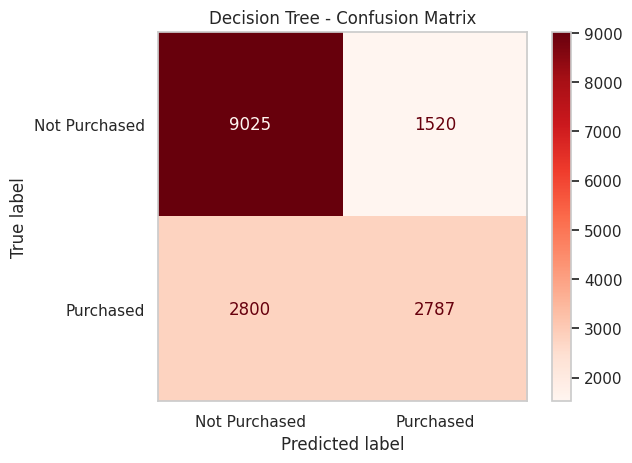

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_dt)

# Create and display heatmap
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Purchased", "Purchased"])
disp.plot(cmap=plt.cm.Reds)
plt.title("Decision Tree - Confusion Matrix")
plt.grid(False)
plt.show()

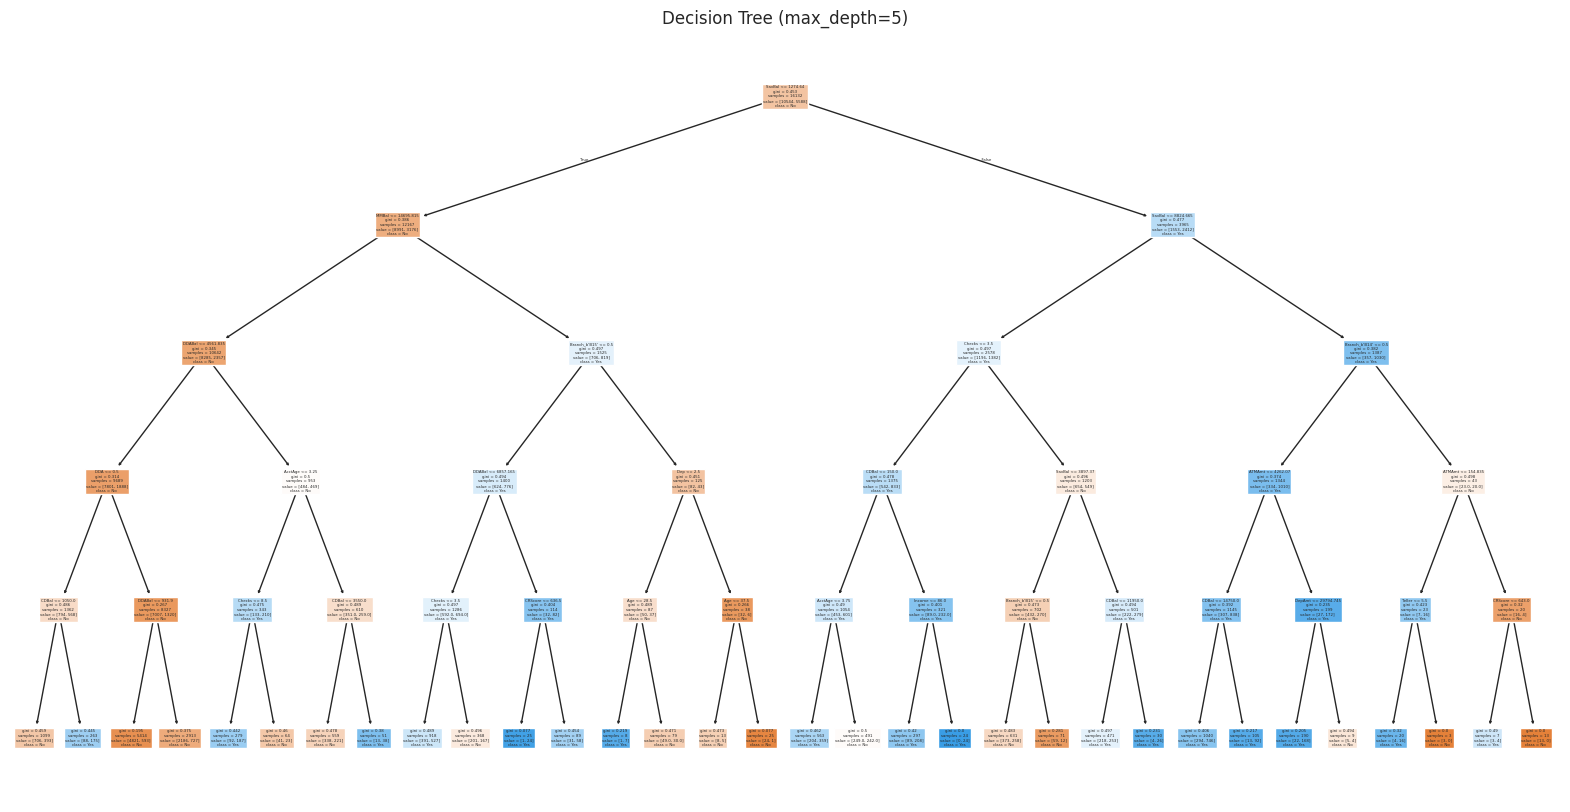

In [ ]:
# Visualize the tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=X.columns.tolist(), class_names=['No', 'Yes'], filled=True)
plt.title("Decision Tree (max_depth=5)")
plt.show()


=== Logistic Regression Evaluation ===
Training Accuracy: 0.72713
Test Accuracy: 0.73227
Precision: 0.68824
Recall: 0.41489
F1 Score: 0.51770
AUC-ROC: 0.77315

Classification Report:
               precision    recall  f1-score   support

         0.0       0.74      0.90      0.81     10545
         1.0       0.69      0.41      0.52      5587

    accuracy                           0.73     16132
   macro avg       0.72      0.66      0.67     16132
weighted avg       0.72      0.73      0.71     16132

Confusion Matrix:
 [[9495 1050]
 [3269 2318]]


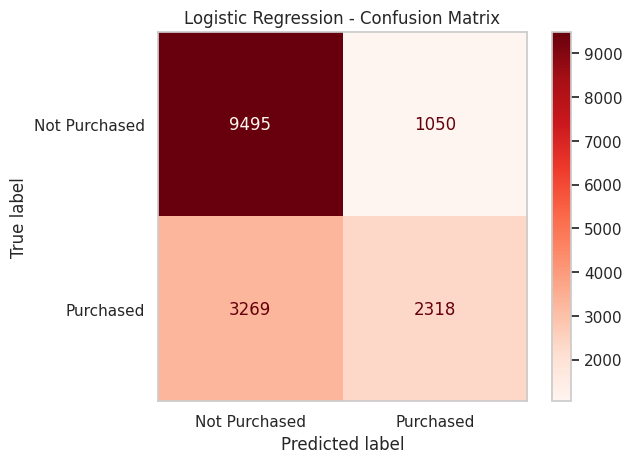

In [ ]:
# 2. Logistic Regression (with Coefficient Analysis)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# Logistic Regression with scaled inputs
lr_model = LogisticRegression(max_iter=1000, solver='lbfgs', random_state=42)
lr_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_lr = lr_model.predict(X_test_scaled)
y_prob_lr = lr_model.predict_proba(X_test_scaled)[:, 1]

# Evaluation metrics
print("=== Logistic Regression Evaluation ===")
print(f"Training Accuracy: {lr_model.score(X_train_scaled, y_train):.5f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred_lr):.5f}")
print(f"Precision: {precision_score(y_test, y_pred_lr):.5f}")
print(f"Recall: {recall_score(y_test, y_pred_lr):.5f}")
print(f"F1 Score: {f1_score(y_test, y_pred_lr):.5f}")
print(f"AUC-ROC: {roc_auc_score(y_test, y_prob_lr):.5f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))


from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_lr)

# Create and display heatmap
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Purchased", "Purchased"])
disp.plot(cmap=plt.cm.Reds)
plt.title("Logistic Regression - Confusion Matrix")
plt.grid(False)
plt.show()



In [ ]:
# Coefficients and Odds Ratios:

coeff_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr_model.coef_[0],
    'OddsRatio': np.exp(lr_model.coef_[0])
})
coeff_df.sort_values('OddsRatio', ascending=False)


,Feature,Coefficient,OddsRatio
11,SavBal,0.668951,1.952188
2,DDABal,0.392477,1.480644
24,MM,0.359662,1.432844
16,CD,0.300442,1.350456
13,ATMAmt,0.275862,1.317666
...,...,...,...
25,MMBal,-0.128856,0.879100
8,Phone,-0.130270,0.877859
41,Dep,-0.133267,0.875231
51,Branch_b'B16',-0.142171,0.867473


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6675 - loss: 0.6470 - val_accuracy: 0.6950 - val_loss: 0.5825
Epoch 2/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7267 - loss: 0.5446 - val_accuracy: 0.7030 - val_loss: 0.5798
Epoch 3/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7393 - loss: 0.5143 - val_accuracy: 0.7040 - val_loss: 0.5799
Epoch 4/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7592 - loss: 0.5060 - val_accuracy: 0.7060 - val_loss: 0.5760
Epoch 5/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7641 - loss: 0.4943 - val_accuracy: 0.7050 - val_loss: 0.5837
505/505 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
=== Neural Network ===
              precision    recall  f1-score   support

         0.0       0.76      0.85      0.80     10545
         1.0       0.63      0.50      0.56      5587

    accuracy                           0.73     16132
   macro avg       0.70      0.67      0.68     16132
weighted avg       0.72      

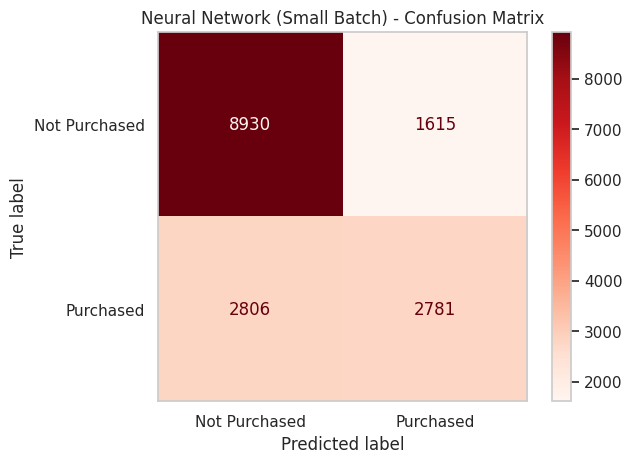

In [ ]:
# 3. Neural Network (Keras) - trained on smaller batch

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

nn_model = Sequential()
nn_model.add(Dense(32, input_dim=X_train_scaled.shape[1], activation='relu'))
nn_model.add(Dense(16, activation='relu'))
nn_model.add(Dense(1, activation='sigmoid'))

nn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train
#history = nn_model.fit(X_train_scaled, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=0)

#history = nn_model.fit(X_train_scaled, y_train, epochs=10, batch_size=16, validation_split=0.2, verbose=1)

# Train with smaller data & lower batch size
history = nn_model.fit(
    X_train_scaled[:5000], y_train[:5000],  # Train on only 5,000 samples
    epochs=5,                               # Just 5 epochs to test
    batch_size=8,                           # Smaller batch size
    validation_split=0.2,
    verbose=1
)

# Evaluate
y_prob_nn = nn_model.predict(X_test_scaled).flatten()
y_pred_nn = (y_prob_nn > 0.5).astype(int)

print("=== Neural Network ===")
print(classification_report(y_test, y_pred_nn))
print("AUC-ROC:", roc_auc_score(y_test, y_prob_nn))

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_nn)

# Plot heatmap
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Purchased", "Purchased"])
disp.plot(cmap=plt.cm.Reds)
plt.title("Neural Network (Small Batch) - Confusion Matrix")
plt.grid(False)
plt.show()

Epoch 1/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.6382 - loss: 0.6444 - val_accuracy: 0.7220 - val_loss: 0.5630
Epoch 2/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7191 - loss: 0.5557 - val_accuracy: 0.7289 - val_loss: 0.5505
Epoch 3/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7347 - loss: 0.5301 - val_accuracy: 0.7254 - val_loss: 0.5467
Epoch 4/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7406 - loss: 0.5243 - val_accuracy: 0.7301 - val_loss: 0.5406
Epoch 5/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7516 - loss: 0.5067 - val_accuracy: 0.7363 - val_loss: 0.5370
Epoch 6/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7584 - loss: 0.4952 - val_accuracy: 0.7437 - val_loss: 0.5303
Epoch 7/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7649 - loss: 0.4816 - val_accuracy: 0.7366 - val_loss: 0.5447
Epoch 8/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7692 - loss: 0.4787 - val_accuracy: 0

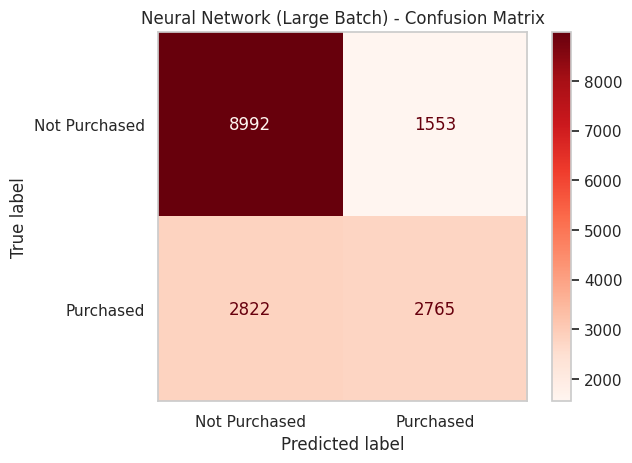

In [ ]:
# Neural network - trained on large batch size

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from sklearn.metrics import classification_report, roc_auc_score

# Define the model architecture
nn_model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),  # Dynamic input shape
    Dense(64, activation='relu'),             # Increased neurons
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')            # Binary classification
])

# Compile the model
nn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model on full training data
history = nn_model.fit(
    X_train_scaled, y_train,
    epochs=20,               # can go up to 30–50 with early stopping
    batch_size=64,           # Larger batch size
    validation_split=0.2,
    verbose=1
)

# Predict probabilities and classes
y_prob_nn = nn_model.predict(X_test_scaled).flatten()
y_pred_nn = (y_prob_nn > 0.5).astype(int)

# Evaluation metrics
print("=== Neural Network Evaluation ===")
print(classification_report(y_test, y_pred_nn))
print(f"AUC-ROC: {roc_auc_score(y_test, y_prob_nn):.5f}")

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_nn)

# Heatmap Display
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Purchased", "Purchased"])
disp.plot(cmap=plt.cm.Reds)
plt.title("Neural Network (Large Batch) - Confusion Matrix")
plt.grid(False)
plt.show()

=== Random Forest ===
              precision    recall  f1-score   support

         0.0       0.78      0.85      0.82     10545
         1.0       0.67      0.55      0.60      5587

    accuracy                           0.75     16132
   macro avg       0.72      0.70      0.71     16132
weighted avg       0.74      0.75      0.74     16132

AUC-ROC: 0.79761


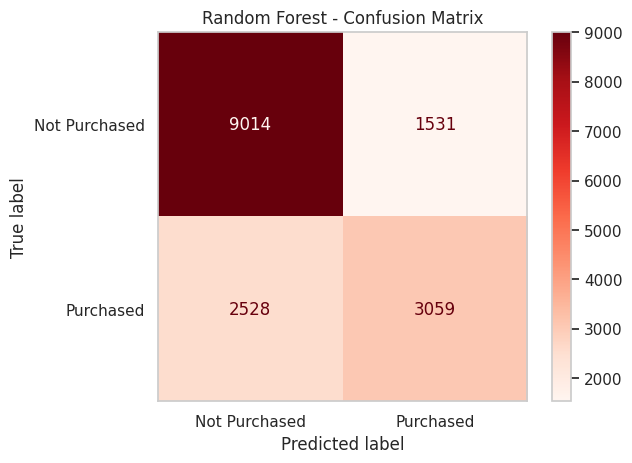

In [ ]:
# Random Forest

# Train the model

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

# Initialize and train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

print("=== Random Forest ===")
print(classification_report(y_test, y_pred_rf))
print(f"AUC-ROC: {roc_auc_score(y_test, y_prob_rf):.5f}")

from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)

# Display Heatmap
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Purchased", "Purchased"])
disp.plot(cmap=plt.cm.Reds)
plt.title("Random Forest - Confusion Matrix")
plt.grid(False)
plt.show()

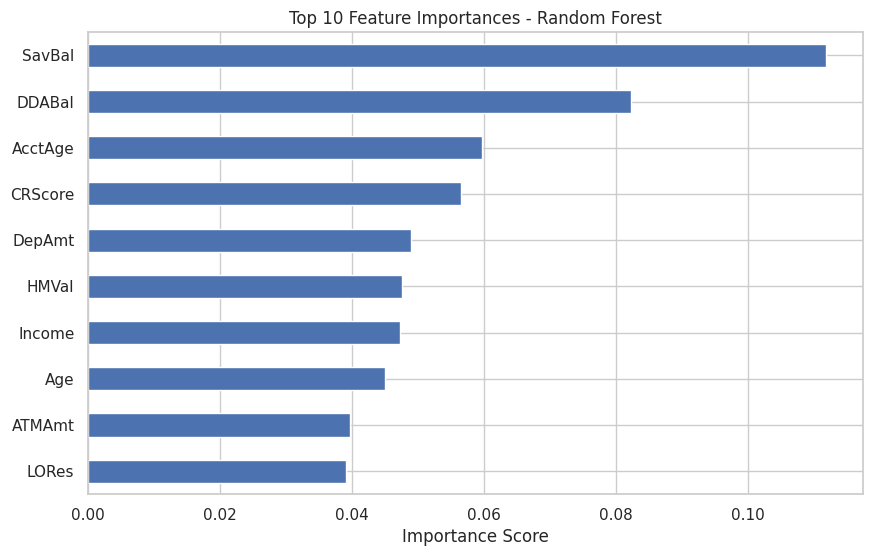

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importances
importances = pd.Series(rf_model.feature_importances_, index=X.columns)
top_importances = importances.sort_values(ascending=False).head(10)

# Plot top 10 important features
plt.figure(figsize=(10, 6))
top_importances.plot(kind='barh')
plt.title("Top 10 Feature Importances - Random Forest")
plt.gca().invert_yaxis()
plt.xlabel("Importance Score")
plt.show()


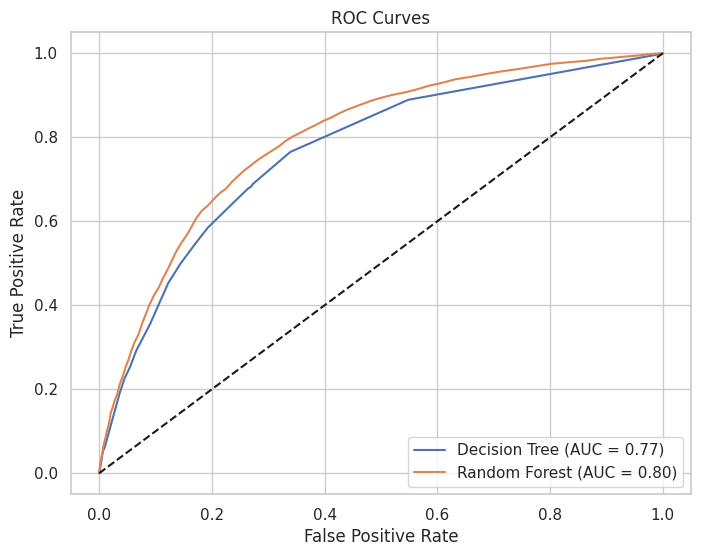

In [ ]:
# ROC curve for decision tree and random forest
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Decision Tree ROC Curve
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_prob_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Random Forest ROC Curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')
plt.show()

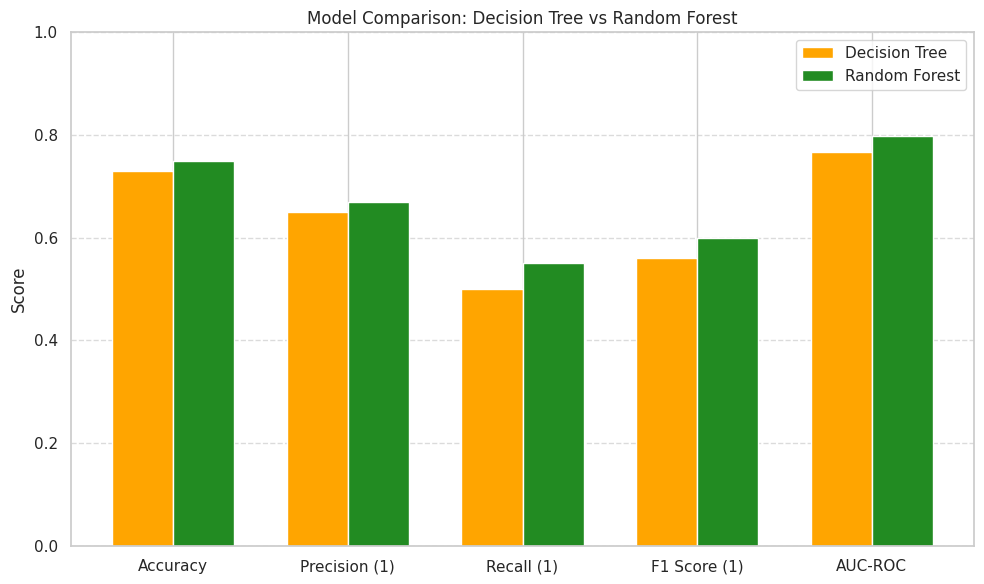

In [ ]:
# Model Comparison: Decision Tree vs Random Forest

import matplotlib.pyplot as plt
import numpy as np

# Metrics for both models
metrics = ['Accuracy', 'Precision (1)', 'Recall (1)', 'F1 Score (1)', 'AUC-ROC']
decision_tree_scores = [0.73, 0.65, 0.50, 0.56, 0.7671]
random_forest_scores = [0.75, 0.67, 0.55, 0.60, 0.7976]

# X-axis locations
x = np.arange(len(metrics))
width = 0.35  # width of the bars

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(x - width/2, decision_tree_scores, width, label='Decision Tree', color='orange')
plt.bar(x + width/2, random_forest_scores, width, label='Random Forest', color='forestgreen')

# Labels & formatting
plt.ylabel('Score')
plt.title('Model Comparison: Decision Tree vs Random Forest')
plt.xticks(x, metrics)
plt.ylim(0, 1)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
# LASSO Regression

from sklearn.linear_model import LogisticRegressionCV

# LASSO with cross-validation
lasso_model = LogisticRegressionCV(
    cv=5,
    penalty='l1',
    solver='liblinear',  # solver that supports L1
    scoring='accuracy',
    max_iter=1000,
    random_state=42
)

lasso_model.fit(X_train_scaled, y_train)


LogisticRegressionCV(cv=5, max_iter=1000, penalty='l1', random_state=42,
                     scoring='accuracy', solver='liblinear')

=== LASSO Regression ===
              precision    recall  f1-score   support

         0.0       0.74      0.90      0.81     10545
         1.0       0.69      0.42      0.52      5587

    accuracy                           0.73     16132
   macro avg       0.72      0.66      0.67     16132
weighted avg       0.72      0.73      0.71     16132

AUC-ROC: 0.7731841419104144


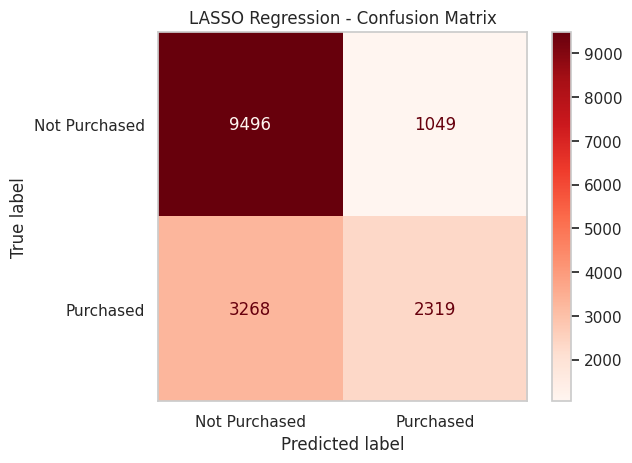

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score

# Predictions
y_pred_lasso = lasso_model.predict(X_test_scaled)
y_prob_lasso = lasso_model.predict_proba(X_test_scaled)[:, 1]

# Evaluation
print("=== LASSO Regression ===")
print(classification_report(y_test, y_pred_lasso))
print("AUC-ROC:", roc_auc_score(y_test, y_prob_lasso))

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_lasso)

# Display Heatmap
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Purchased", "Purchased"])
disp.plot(cmap=plt.cm.Reds)
plt.title("LASSO Regression - Confusion Matrix")
plt.grid(False)
plt.show()


In [ ]:
import pandas as pd
import numpy as np

lasso_coeffs = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lasso_model.coef_[0]
})

# Keep only non-zero coefficients
selected_features = lasso_coeffs[lasso_coeffs['Coefficient'] != 0]
selected_features_sorted = selected_features.reindex(selected_features.Coefficient.abs().sort_values(ascending=False).index)

# Show top features
print("Top LASSO-selected features:")
display(selected_features_sorted.head(10))



Top LASSO-selected features:


,Feature,Coefficient
11,SavBal,0.670200
2,DDABal,0.393213
24,MM,0.359086
16,CD,0.300292
13,ATMAmt,0.276056
10,Sav,0.269691
1,DDA,-0.214241
29,CC,0.188262
9,Teller,0.156566
51,Branch_b'B16',-0.142836


In [ ]:
# 4. Model Comparison
    * Create a performance comparison table for all models.
    * Identify and justify the best-performing model.

IndentationError: unexpected indent (<ipython-input-55-b6a41be54bdd>, line 2)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def evaluate_model(y_true, y_pred, y_prob):
    return {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1 Score': f1_score(y_true, y_pred),
        'AUC-ROC': roc_auc_score(y_true, y_prob)
    }


In [ ]:
# Decision Tree
metrics_dt = evaluate_model(y_test, y_pred_dt, y_prob_dt)

# Logistic Regression
metrics_lr = evaluate_model(y_test, y_pred_lr, y_prob_lr)

# Neural Network (MLP or Keras-based)
metrics_nn = evaluate_model(y_test, y_pred_nn, y_prob_nn)

# Random Forest
metrics_rf = evaluate_model(y_test, y_pred_rf, y_prob_rf)

# LASSO Regression
metrics_lasso = evaluate_model(y_test, y_pred_lasso, y_prob_lasso)


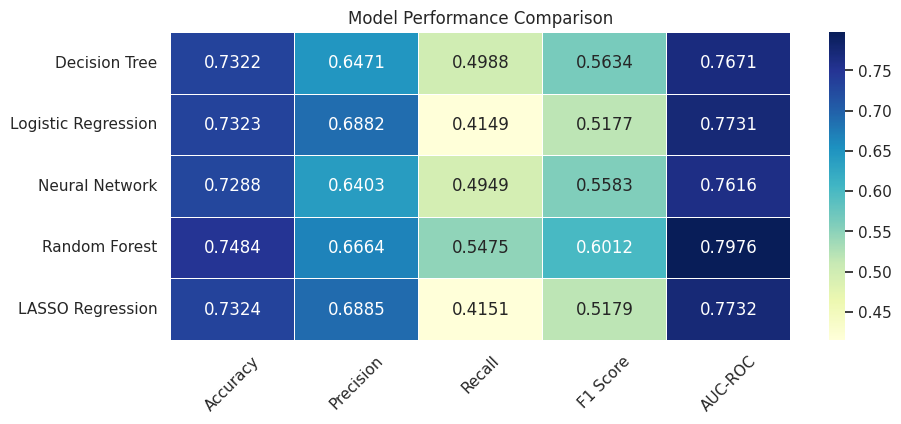

In [ ]:
import pandas as pd

# Create a DataFrame to store the evaluation metrics for each model
model_results = pd.DataFrame({
    'Decision Tree': metrics_dt,
    'Logistic Regression': metrics_lr,
    'Neural Network': metrics_nn,
    'Random Forest': metrics_rf,
    'LASSO Regression': metrics_lasso
}).T  # Transpose the DataFrame for better readability

# Round the values in the DataFrame to 4 decimal places for neatness
model_results = model_results.round(4)

# Display the DataFrame containing the evaluation metrics
model_results

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
sns.heatmap(model_results, annot=True, cmap="YlGnBu", fmt=".4f", linewidths=0.5, cbar=True)
plt.title("Model Performance Comparison")
plt.yticks(rotation=0)
plt.xticks(rotation=45)
plt.show()



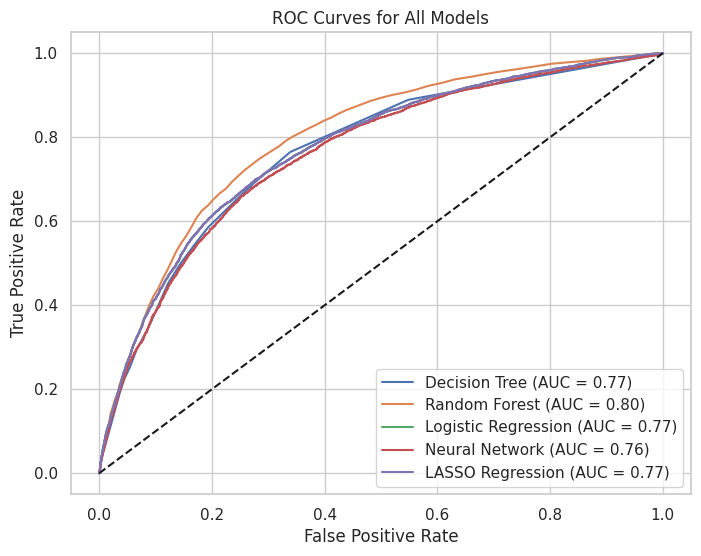

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming you have already trained and obtained prediction probabilities for other models (e.g., Logistic Regression, Neural Network)
# y_prob_lr, y_prob_nn, etc.

# Logistic Regression ROC Curve
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_prob_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

# Neural Network ROC Curve
fpr_nn, tpr_nn, thresholds_nn = roc_curve(y_test, y_prob_nn)
roc_auc_nn = auc(fpr_nn, tpr_nn)

# LASSO Regression ROC Curve
fpr_lasso, tpr_lasso, thresholds_lasso = roc_curve(y_test, y_prob_lasso)
roc_auc_lasso = auc(fpr_lasso, tpr_lasso)


plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')
plt.plot(fpr_nn, tpr_nn, label=f'Neural Network (AUC = {roc_auc_nn:.2f})')
plt.plot(fpr_lasso, tpr_lasso, label=f'LASSO Regression (AUC = {roc_auc_lasso:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for All Models')
plt.legend(loc='lower right')
plt.show()


In [ ]:

# Model Performance Summary

#Based on the evaluation metrics, the Random Forest model emerged as the most effective among all models tested.
#It achieved the highest accuracy (74.84%), F1 score (0.6012), and AUC-ROC (0.7976), indicating strong overall performance and excellent ability to distinguish between purchasers and non-purchasers.
#Additionally, it demonstrated a well-balanced trade-off between precision and recall, making it a reliable choice for predicting customer purchase behavior in a variable annuity marketing campaign.
